## December 2020 CLICC Data Project
by Julia Wood

### Focus: How did students and staff utilize CLICC's lending services this quarter (Sep - Dec 2020)?
    a. What is the demographic breakdown between undergrads, grads, faculty, and staff for checking out equipment?
    b. How do items vary in popularity amongst the above groups? 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("JIRA Help Desk 2020-12-09T13_36_07-0800.csv")
df2 = pd.read_csv("JIRA Help Desk 2020-12-09T13_36_25-0800.csv")

In [3]:
print(df1.shape)
print(df2.shape)

(433, 544)
(665, 536)


In [4]:
pd.set_option('display.max_columns', None)
df1.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,Project url,Priority,Resolution,Assignee,Reporter,Creator,Created,Updated,Last Viewed,Resolved,Due Date,Votes,Labels,Labels.1,Labels.2,Labels.3,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Original Estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level,Outward issue link (Blocks),Outward issue link (Issue split),Outward issue link (Relates),Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Custom field (# of Positions Available),10 days of customer inactivity,10 days of customer inactivity simplified,Custom field (1st Reviewing Archivist),Custom field (2nd Assignee),Custom field (2nd Reviewing Archivist),"Custom field (3DS, 3DP, Laser Etching)",Custom field (3rd Reviewing Archivist),Custom field (4th Reviewing Archivist),5 days of customer inactivity,5 days of customer inactivity simplified,Custom field (670 Additional Sources (D)),Custom field (9 Digit Course SRS Number),Custom field (Academic Title),Custom field (Accession Number),Custom field (Accession Title),Custom field (Account End Date),Custom field (Account Request Type),Custom field (Account Start Date),Custom field (Account/Fund/Job Nickname),Custom field (Activity Start),Custom field (Actual Accession Hours),Custom field (Actual Processing Hours),Custom field (Additional Interview Participants),Custom field (Additional Resource(s)),Custom field (Advertising To Be Included),Custom field (Affiliated Library Unit),Custom field (Affiliation),Custom field (Appointee's Name),Custom field (Appointment Availability),Custom field (Approved by),Custom field (Approximate Dimensions),Custom field (Are other users experiencing the same issue?),Custom field (Are you employed by UCLA?),Custom field (Are you on campus?),Custom field (Assigned Laptop/iPad Equipment),Custom field (Attendees),Custom field (Available to work during intersessions and holidays?),Custom field (Available to work during summer vacation?),Custom field (Background Check Required?),Custom field (Bar Code),Custom field (Barcode Type),Custom field (Barcodes for Laptop/iPad and Charger),Custom field (Begin GA Funding Effective Date),Custom field (Begin Work-Study Effective Date),Custom field (Box Number),Custom field (Brief Description of Resource),Custom field (Brief summary of issue),Custom field (Browser),Custom field (Browser Options),Custom field (Building),Custom field (Building Services Request Type),Custom field (CLICC Additional Consultant),Custom field (CLICC Additional Printer Paper),Custom field (CLICC Date & Time Picker),Custom field (CLICC Desktop Problems),Custom field (CLICC Laptop Number 2019),Custom field (CLICC Laptop Problems),Custom field (CLICC Laptop | Operating System),Custom field (CLICC Locations),Custom field (CLICC Print Release Station Problems),Custom field (CLICC Report Issue),Custom field (CLICC or ITS),Custom field (CLICC: Software),Custom field (Campus Address),Custom field (Can you commit to work more than two quarters?),Custom field (Cataloger),Custom field (Category),Custom field (Change Percent To),Custom field (Change in Account/Fund?),Custom field (Class/Lab Name),Cleaning - SLA,Cleaning - SLA simplified,Custom field (Clone Version),Custom field (Collection Abstract),Custom field (Collection File Pathway),Custom field (Collection Outcome),Custom field (Collection Steward),Custom field (Collection Summary),Custom field (Comments),Custom field (Condition),Custom field (Confluence Documentation),Custom field (Contact Information),Custom field (Contacted Own Department for Device),Custom field (Container Summary),Custom field (Course Department),Custom field (Course Title),Custom field (Curator),Custom field (Curatorial Proposal Form),Cust

### Checking to see that "Custom field (UID Number)" is a good field for individual identification, and it is because there are no null values. :)

In [5]:
df1["Custom field (UID Number)"].isnull().sum() 

0

### Picking the columns I want to include in my dataset, because there are ove 500 columns in the dataframes above. 

In [6]:
cols = ["Creator",  
 "Custom field (UID Number)", 
 "Custom field (UCLA Staff/Faculty Status (Non-Surveyed))", 
 "Custom field (UCLA Student Status (Non-Surveyed))", 
 "Custom field (Faculty/Instructor Requested Equipment)" , 
 "Custom field (Assigned Laptop/iPad Equipment)", 
 "Custom field (Getting a MiFi Hotspot?)", 
 "Custom field (Undergraduate Equipment)", 
       "Custom field (Graduate Equipment)"]





In [7]:
df1.loc[:, cols]

,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment)
0,utsavm9@g.ucla.edu,805127226,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
1,mariahlara4@g.ucla.edu,105527195,NaN,Graduate,NaN,ITS iPad,No,NaN,iPad
2,ariyanaash@gmail.com,905544515,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
3,sarwari1999@g.ucla.edu,304764960,NaN,Undergraduate,NaN,ITS Windows Laptop,No,MacBook,NaN
4,Kgray3@ucla.edu,605507128,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
...,...,...,...,...,...,...,...,...,...
428,kkchen@g.ucla.edu,205024368,NaN,Graduate,NaN,ITS Windows Laptop,No,NaN,NaN
429,vvillaga@ucla.edu,105358593,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
430,ROSEBERRY8016@ROCKETMAIL.COM,105382786,NaN,Undergraduate,NaN,CLICC HP Laptop,No,Windows laptop,NaN
431,angeliki.asprouli@gmail.com,005647080,Faculty/Instructor,NaN,Macbook,CLICC MacBook,No,NaN,NaN


### Making my final dataframe with the designated columns from both of the dataframes Jack sent me from CLICC checkouts from Sep-Dec 2020. 

In [8]:
df = pd.concat([df1.loc[:, cols], df2.loc[:, cols]])

In [9]:
df

,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment)
0,utsavm9@g.ucla.edu,805127226,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
1,mariahlara4@g.ucla.edu,105527195,NaN,Graduate,NaN,ITS iPad,No,NaN,iPad
2,ariyanaash@gmail.com,905544515,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
3,sarwari1999@g.ucla.edu,304764960,NaN,Undergraduate,NaN,ITS Windows Laptop,No,MacBook,NaN
4,Kgray3@ucla.edu,605507128,NaN,Undergraduate,NaN,CLICC MacBook,Yes,MacBook,NaN
...,...,...,...,...,...,...,...,...,...
660,Ceshajames@g.ucla.edu,205527374,NaN,Graduate,NaN,NaN,Yes,NaN,Other
661,fcastro161@g.ucla.edu,705393503,NaN,Undergraduate,NaN,NaN,Yes,Other,NaN
662,lezellegadosedu@gmail.com,705011306,NaN,Undergraduate,NaN,CLICC MacBook,No,MacBook,NaN
663,calebalexander@alum.calarts.edu,405498931,NaN,Graduate,NaN,ITS MacBook,No,NaN,Other


In [10]:
print(df['Custom field (Undergraduate Equipment)'].isna().sum())
print(df['Custom field (Graduate Equipment)'].isna().sum())

487
657


In [11]:
sum(df.groupby('Custom field (UID Number)').count().iloc[:, 0] > 1)
# 45 people have more than one ticket

45

# Creating a students dataframe to look out how undergraduates and graduate students used CLICC during the Fall 2020 academic quarter.

In [12]:
students = df[df["Custom field (UCLA Staff/Faculty Status (Non-Surveyed))"].isna()]

students = students.drop(df.columns[[2, 4]], axis = 1) #removing faculty specific columns

students.head()

,Creator,Custom field (UID Number),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment)
0,utsavm9@g.ucla.edu,805127226,Undergraduate,NaN,Yes,Other,NaN
1,mariahlara4@g.ucla.edu,105527195,Graduate,ITS iPad,No,NaN,iPad
2,ariyanaash@gmail.com,905544515,Undergraduate,CLICC MacBook,Yes,MacBook,NaN
3,sarwari1999@g.ucla.edu,304764960,Undergraduate,ITS Windows Laptop,No,MacBook,NaN
4,Kgray3@ucla.edu,605507128,Undergraduate,CLICC MacBook,Yes,MacBook,NaN


## Combine the undergraduate equipment, graduate equipment, and assigned laptop/iPad equipment checked out into one column. 

In [13]:
students['Equipment'] = students['Custom field (Undergraduate Equipment)'].fillna(students['Custom field (Graduate Equipment)']).fillna(students['Custom field (Assigned Laptop/iPad Equipment)'])
students.head()


,Creator,Custom field (UID Number),Custom field (UCLA Student Status (Non-Surveyed)),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Custom field (Undergraduate Equipment),Custom field (Graduate Equipment),Equipment
0,utsavm9@g.ucla.edu,805127226,Undergraduate,NaN,Yes,Other,NaN,Other
1,mariahlara4@g.ucla.edu,105527195,Graduate,ITS iPad,No,NaN,iPad,iPad
2,ariyanaash@gmail.com,905544515,Undergraduate,CLICC MacBook,Yes,MacBook,NaN,MacBook
3,sarwari1999@g.ucla.edu,304764960,Undergraduate,ITS Windows Laptop,No,MacBook,NaN,MacBook
4,Kgray3@ucla.edu,605507128,Undergraduate,CLICC MacBook,Yes,MacBook,NaN,MacBook


In [14]:
equipmentmap = {"ITS Windows Laptop": "Windows laptop", "CLICC HP Laptop":"Windows laptop", "CLICC MacBook":"MacBook" }

In [15]:
students['Equipment'].map(equipmentmap).fillna(students['Equipment']).fillna('Other')
students['Equipment'] = students['Equipment'].map(equipmentmap).fillna(students['Equipment']).fillna('Other')

In [16]:
print(students['Equipment'].isna().sum())
# combined all the checkout columns into one for the most filled data possible

0


### Undergraduate versus graduate students

In [17]:
students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique()

,Custom field (UID Number)
Custom field (UCLA Student Status (Non-Surveyed)),
Graduate,420
Undergraduate,594


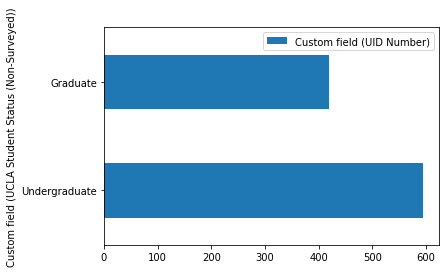

In [18]:
students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique().sort_values(by = 'Custom field (UID Number)', ascending = False).plot.barh()


#### Breakdown:

There are 420 unique graduate students and 594 unique undergraduate students that have checked something out from CLICC this quarter. For a total of 1014 unique UCLA students!

## Now looking at Equipment column!

## Accurate measure of total items checked out by combining the undergraduate equipment column, the graduate equipment column, and the assigned laptop/iPad column. 

Equipment column is the combination of 'Custom field (Undergraduate Equipment)' and 'Custom field (Graduate Equipment)' and 'Custom field (Assigned Laptop/iPad Equipment)'. 

In [19]:
totalequip = students.groupby(['Equipment'])[['Custom field (UID Number)']].nunique()['Custom field (UID Number)'].sum()
print('Total student checkouts:', totalequip)

students.groupby(['Equipment'])[['Custom field (UID Number)']].nunique().rename(columns = {'Custom field (UID Number)': '# of devices checked out'}).sort_values(by = '# of devices checked out', ascending = False)



Total student checkouts: 1036


,# of devices checked out
Equipment,
Other,459
MacBook,299
Windows laptop,171
iPad,93
ChromeBook,12
Touchscreen Windows Laptop,2


#### Breakdown:

There were 1036 items checked out to students from CLICC this quarter. With 'Other' (most commonly MiFi) being the most popular item checked out and the Touchscreen Windows Laptop only being checked out to two unique students. 

In [20]:
totalequip = students.groupby(['Custom field (Undergraduate Equipment)'])[['Custom field (UID Number)']].nunique()['Custom field (UID Number)'].sum()
print("Total number of unique undergraduate checkouts:" , totalequip)
undergradequip = students.groupby(['Custom field (Undergraduate Equipment)'])[['Custom field (UID Number)']].nunique().reset_index().rename(columns = {'Custom field (UID Number)': '# of devices checked out'})

undergradequip['% of devices checked out'] = round(undergradequip['# of devices checked out']/totalequip, 4)*100

undergradequip.sort_values('% of devices checked out', ascending = False)

Total number of unique undergraduate checkouts: 602


,Custom field (Undergraduate Equipment),# of devices checked out,% of devices checked out
2,Other,309,51.33
1,MacBook,188,31.23
3,Windows laptop,96,15.95
0,ChromeBook,9,1.50


#### Breakdown:

This breakdown shows 602 unique undergraduate checkouts. This differs from the 594 total undergraduates above meaning that some (at most 8) undergraduates checked out more than one item. Where other is the most popular item checked out and chromebooks are the least popular. 


In [21]:
totalequip = students.groupby(['Custom field (Graduate Equipment)'])[['Custom field (UID Number)']].nunique()['Custom field (UID Number)'].sum()
print("Total number of unique graduate checkouts:" , totalequip)

gradequip = students.groupby(['Custom field (Graduate Equipment)'])[['Custom field (UID Number)']].nunique().reset_index().rename(columns = {'Custom field (UID Number)': '# of devices checked out'})

gradequip['% of devices checked out'] = round(gradequip['# of devices checked out']/totalequip, 4)*100

gradequip.sort_values('% of devices checked out', ascending = False)

Total number of unique graduate checkouts: 429


,Custom field (Graduate Equipment),# of devices checked out,% of devices checked out
2,Other,149,34.73
1,MacBook,110,25.64
5,iPad,93,21.68
4,Windows laptop,72,16.78
0,ChromeBook,3,0.70
3,Touchscreen Windows Laptop,2,0.47


#### Breakdown:

This breakdown shows 429 unique graduate checkouts. This differs from the 420 total graduates above meaning that some (at most 9) graduate students checked out more than one item. Where other is the most popular item checked out and Touchscreen Windows Laptops are the least popular. 

Also reveals that only graduate students can check out iPads and Touchscreen Windows Laptops.

602 + 429 = 1031 (1036 above is from the 5 extra entries that were filled in from the assigned laptop/ipad column)


## Now look at Equipment and Mifi column combined!!!

In [22]:
x = students['Equipment'].astype(str)[664]
x.replace(" ", "")

'Windowslaptop'

In [23]:
equipmentnospace = [x.replace(" ", "") for x in students['Equipment'].astype(str)]
equipmentnospace
res = [i + " " + j for i, j in zip(equipmentnospace, students['Custom field (Getting a MiFi Hotspot?)'].astype(str))] 

In [24]:
students['Equipment&MiFi'] = res
students.dtypes

Creator                                              object
Custom field (UID Number)                            object
Custom field (UCLA Student Status (Non-Surveyed))    object
Custom field (Assigned Laptop/iPad Equipment)        object
Custom field (Getting a MiFi Hotspot?)               object
Custom field (Undergraduate Equipment)               object
Custom field (Graduate Equipment)                    object
Equipment                                            object
Equipment&MiFi                                       object
dtype: object

### Now I'm going to group by student ID and get the counts of how many students had each unique ticket.



In [25]:
studentsequip = students.groupby(['Custom field (UID Number)'])[['Equipment&MiFi']].aggregate(set).reset_index()
studentsequip


,Custom field (UID Number),Equipment&MiFi
0,003386297,{MacBook Yes}
1,003488658,{iPad Yes}
2,003737993,{Other Yes}
3,004212084,"{Other Yes, MacBook No}"
4,004422261,{iPad No}
...,...,...
1009,905623066,{MacBook Yes}
1010,905625173,{Other Yes}
1011,905627445,{Other Yes}
1012,905628548,{Other Yes}


In [26]:
studentsequip['Equipment&MiFi'].value_counts()

{Other Yes}                              432
{MacBook No}                             169
{Windowslaptop No}                       122
{MacBook Yes}                            115
{iPad No}                                 76
{Windowslaptop Yes}                       35
{iPad Yes}                                11
{Other Yes, Windowslaptop No}              9
{ChromeBook No}                            9
{Other No}                                 6
{Other Yes, MacBook No}                    6
{MacBook Yes, MacBook No}                  5
{Windowslaptop No, Windowslaptop Yes}      5
{ChromeBook Yes}                           3
{MacBook No, iPad Yes}                     2
{Other Yes, iPad No}                       2
{Other Yes, Other No}                      2
{TouchscreenWindowsLaptop No}              1
{MacBook Yes, iPad No}                     1
{TouchscreenWindowsLaptop Yes}             1
{Other No, iPad No}                        1
{Other No, MacBook No}                     1
Name: Equi

## Accurate list  of checked out items by students!!!

#### Breakdown:

- {Other Yes} represents MiFi
- {MacBook No} represents MacBook 
- {MacBook Yes} represents MacBook and MiFi
- {Windowslaptop No, Other Yes} represents the number of students who checked out a Windows laptop and a MiFi on separate tickets

So the most popular student check out was a MiFi hotspot (432 unique students got a MiFi), followed by a MacBook, then a Windows laptop, then a Macbook with a MiFi in the same ticket, then just an iPad, and so on.... 

In [27]:
students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))' , 'Equipment&MiFi' ])[['Custom field (UID Number)']].nunique().unstack()


Custom field (UID Number)  \
Equipment&MiFi                                                ChromeBook No   
Custom field (UCLA Student Status (Non-Surveyed))                             
Graduate                                                                3.0   
Undergraduate                                                           6.0   

                                                                             \
Equipment&MiFi                                    ChromeBook Yes MacBook No   
Custom field (UCLA Student Status (Non-Surveyed))                             
Graduate                                                     NaN       76.0   
Undergraduate                                                3.0      107.0   

                                                                        \
Equipment&MiFi                                    MacBook Yes Other No   
Custom field (UCLA Student Status (Non-Surveyed))                        
Graduate                                                 37.0      5.0   
Undergraduate                                            84.0      5.0   

                                                             \
Equipment&MiFi                                    Other Yes   
Custom field (UCLA Student Status (Non-Surveyed))             
Graduate                                              147.0   
Undergraduate                                         304.0   

                                                                               \
Equipment&MiFi                                    TouchscreenWindowsLaptop No   
Custom field (UCLA Student Status (Non-Surveyed))                               
Graduate                                                                  1.0   
Undergraduate                                                             NaN   

                                                                                \
Equipment&MiFi                                    TouchscreenWindowsLaptop Yes   
Custom field (UCLA Student Status (Non-Surveyed))                                
Graduate                                                                   1.0   
Undergraduate                                                              NaN   

                                                                    \
Equipment&MiFi                                    Windowslaptop No   
Custom field (UCLA Student Status (Non-Surveyed))                    
Graduate                                                      59.0   
Undergraduate                                                 77.0   

                                                                             \
Equipment&MiFi                                    Windowslaptop Yes iPad No   
Custom field (UCLA Student Status (Non-Surveyed))                             
Graduate                                                       18.0    80.0   
Undergraduate                                                  22.0     NaN   

                                                            
Equipment&MiFi                                    iPad Yes  
Custom field (UCLA Student Status (Non-Surveyed))           
Graduate                                              13.0  
Undergraduate                                          NaN

#### Breakdown:

This gives us the breakdown of tickets between undergraduate and graduate students. This counts each ticket so students who have more than one ticket will be represented more than once. 

### Further MiFi breakdown for students

In [28]:
students.groupby(['Custom field (Getting a MiFi Hotspot?)' ])[['Custom field (UID Number)']].nunique()

,Custom field (UID Number)
Custom field (Getting a MiFi Hotspot?),
No,417
Yes,629


#### Breakdown: 
417 students checked out a MiFi, and 629 students did not check out a MiFi. 

In [29]:
students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))', 'Custom field (Getting a MiFi Hotspot?)' ])[['Custom field (UID Number)']].nunique()




Custom field (UID Number)
Custom field (UCLA Student Status (Non-Surveyed)) Custom field (Getting a MiFi Hotspot?)                           
Graduate                                          No                                                            222
                                                  Yes                                                           216
Undergraduate                                     No                                                            195
                                                  Yes                                                           413

#### Breakdown: 
Yes: 216 graduate students checked out a MiFi, and 413 undergraduate students did check out a MiFi. 

No: 222 graduate students did **not** check out a MiFi, and 195 undergraduate students did **not** check out a MiFi. 

In [30]:
smifiequip = students.groupby(['Custom field (Getting a MiFi Hotspot?)', 'Equipment' ])[['Custom field (UID Number)']].nunique().rename(columns = {'Custom field (UID Number)': '# of Devices Checked Out'})#.sort_values(by = 'Custom field (UID Number)', ascending = False)

smifiequip.unstack()

# of Devices Checked Out                \
Equipment                                            ChromeBook MacBook Other   
Custom field (Getting a MiFi Hotspot?)                                          
No                                                            9     183    10   
Yes                                                           3     121   451   

                                                                   \
Equipment                              Touchscreen Windows Laptop   
Custom field (Getting a MiFi Hotspot?)                              
No                                                              1   
Yes                                                             1   

                                                            
Equipment                              Windows laptop iPad  
Custom field (Getting a MiFi Hotspot?)                      
No                                                136   80  
Yes                                                40   13

#### Breakdown:

How students checked out equipment and the MiFi hotspot. For reference, 121 unique students checked out a MacBook and a MiFi hotspot.

This information represents individual tickets (meaning someone could have been counted for a ticket of MacBook and No Mifi and then again for their other ticket of Other and Yes (aka MiFi))

In [31]:
gradvsunderequip = students.groupby(['Custom field (UCLA Student Status (Non-Surveyed))', 'Equipment'])[['Custom field (UID Number)']].nunique().rename(columns = {'Custom field (UID Number)': '# of Devices Checked Out'})#.sort_values(by = 'Custom field (UID Number)', ascending = False)

gradvsunderequip.unstack()

# of Devices Checked Out  \
Equipment                                                       ChromeBook   
Custom field (UCLA Student Status (Non-Surveyed))                            
Graduate                                                               3.0   
Undergraduate                                                          9.0   

                                                                  \
Equipment                                         MacBook  Other   
Custom field (UCLA Student Status (Non-Surveyed))                  
Graduate                                            110.0  150.0   
Undergraduate                                       189.0  309.0   

                                                                              \
Equipment                                         Touchscreen Windows Laptop   
Custom field (UCLA Student Status (Non-Surveyed))                              
Graduate                                                                 2.0   
Undergraduate                                                            NaN   

                                                                        
Equipment                                         Windows laptop  iPad  
Custom field (UCLA Student Status (Non-Surveyed))                       
Graduate                                                    74.0  93.0  
Undergraduate                                               97.0   NaN

#### Breakdown:

How undergraduates versus graduate students checked out equipment. 92 unique undergraduates checked out a CLICC MacBook, for reference.

Note: NaN == 0 students in that category, so no undergraduate students checked out a iPad. 

In [32]:
#students.to_csv('studentsdec.csv')

# Now look at how faculty and staff used CLICC's lending services!

In [33]:
facstaff = df[~df["Custom field (UCLA Staff/Faculty Status (Non-Surveyed))"].isna()]

In [34]:
facstaff = facstaff.drop(df.columns[[3, 7, 8]], axis = 1) #drop undergraduate columns

In [35]:
facstaff.head()

,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?)
16,tonyf@ucla.edu,102747898,Faculty/Instructor,Other,NaN,No
24,tuando@g.ucla.edu,903322927,Faculty/Instructor,Other,NaN,Yes
99,npasternak@g.ucla.edu,205216027,Faculty/Instructor,Macbook,ITS MacBook,Yes
106,sglasner@ucla.edu,902525515,Faculty/Instructor,Windows laptop,ITS Windows Laptop,Yes
107,sshafir@ucla.edu,602870433,Faculty/Instructor,Other,NaN,Yes


### Combine Custom field (Faculty/Instructor Requested Equipment) and Custom field (Assigned Laptop/iPad Equipment) to get the most accurate column of items checked out.  

In [36]:
facstaff['Equipment'] = facstaff['Custom field (Faculty/Instructor Requested Equipment)'].fillna(facstaff['Custom field (Assigned Laptop/iPad Equipment)'])
facstaff = facstaff.set_index(np.arange(40))
facstaff.head(12)


,Creator,Custom field (UID Number),Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),Custom field (Faculty/Instructor Requested Equipment),Custom field (Assigned Laptop/iPad Equipment),Custom field (Getting a MiFi Hotspot?),Equipment
0,tonyf@ucla.edu,102747898,Faculty/Instructor,Other,NaN,No,Other
1,tuando@g.ucla.edu,903322927,Faculty/Instructor,Other,NaN,Yes,Other
2,npasternak@g.ucla.edu,205216027,Faculty/Instructor,Macbook,ITS MacBook,Yes,Macbook
3,sglasner@ucla.edu,902525515,Faculty/Instructor,Windows laptop,ITS Windows Laptop,Yes,Windows laptop
4,sshafir@ucla.edu,602870433,Faculty/Instructor,Other,NaN,Yes,Other
5,jschwada,005647080,Faculty/Instructor,Macbook,NaN,Yes,Macbook
6,radina02@ucla.edu,804945765,Faculty/Instructor,Other,NaN,Yes,Other
7,nayana@ucla.edu,404360223,Faculty/Instructor,iPad,ITS iPad,No,iPad
8,yifanlu@ucla.edu,405628391,Faculty/Instructor,iPad,ITS iPad,No,iPad
9,xli51@ucla.edu,905224260,Faculty/Instructor,Macbook,ITS MacBook,No,Macbook


In [37]:
equipmentmap = {"ITS Windows Laptop": "Windows laptop", "CLICC HP Laptop":"Windows laptop", "CLICC MacBook":"MacBook", "ITS iPad": "iPad" }


In [38]:
newequip = facstaff['Equipment'].map(equipmentmap).fillna(facstaff['Equipment']).fillna("Other")
newequip
facstaff['Equipment'] = newequip

In [39]:
print(facstaff['Equipment'].isna().sum())
# combined all the checkout columns into one for the most filled data possible

0


In [40]:
facstaffcount =  facstaff.groupby(['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique().sort_values(by = 'Custom field (UID Number)', ascending = False)
facstaffcount

,Custom field (UID Number)
Custom field (UCLA Staff/Faculty Status (Non-Surveyed)),
Faculty/Instructor,29
Staff,10


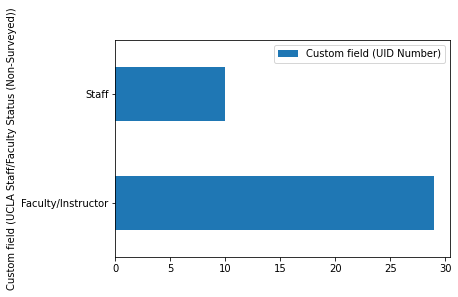

In [41]:
facstaff.groupby(['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))'])[['Custom field (UID Number)']].nunique().sort_values(by = 'Custom field (UID Number)', ascending = False).plot.barh()


### Combine the Equipment and Mifi Columns to get everything checked out in a single ticket

In [42]:
x = facstaff['Equipment'].astype(str)[3]
x.replace(" ", "")

'Windowslaptop'

In [43]:
equipmentnospace = [x.replace(" ", "") for x in facstaff['Equipment'].astype(str)]
equipmentnospace
res = [i + " " + j for i, j in zip(equipmentnospace, facstaff['Custom field (Getting a MiFi Hotspot?)'].astype(str))] 

In [44]:
facstaff['Equipment&MiFi'] = res
facstaff.dtypes

Creator                                                    object
Custom field (UID Number)                                  object
Custom field (UCLA Staff/Faculty Status (Non-Surveyed))    object
Custom field (Faculty/Instructor Requested Equipment)      object
Custom field (Assigned Laptop/iPad Equipment)              object
Custom field (Getting a MiFi Hotspot?)                     object
Equipment                                                  object
Equipment&MiFi                                             object
dtype: object

In [45]:
facstaffcheckout = facstaff.groupby(['Custom field (UID Number)'])[['Equipment&MiFi']].aggregate(list).reset_index()#['Equipment&MiFi'].value_counts()
facstaffcheckout.head()
# see what each person checked out

,Custom field (UID Number),Equipment&MiFi
0,002556182,[Windowslaptop No]
1,002620239,[Windowslaptop No]
2,003614708,[ITSTouchscreenLaptop No]
3,005647080,"[Macbook Yes, Macbook No]"
4,100650831,[ITSTouchscreenLaptop No]


In [46]:
facstaffcheckout['Equipment&MiFi'].value_counts()

[Other Yes]                  9
[iPad No]                    8
[Macbook No]                 7
[Windowslaptop No]           7
[ITSTouchscreenLaptop No]    4
[Windowslaptop Yes]          1
[Other No]                   1
[Macbook Yes, Macbook No]    1
[Macbook Yes]                1
Name: Equipment&MiFi, dtype: int64

## Accurate list of items checked out by faculty & staff!

#### Breakdown:

Here we see the 39 unique staff and faculty member check outs, with the numbers indicating how many people  made that specific checkout. 

- [Other Yes] represents MiFi
- [iPad No] represents iPad and No MiFi
- [MacBook No] represents MacBook and No MiFi
- [MacBook Yes] represents MacBook and MiFi
- [Macbook Yes, Macbook No] represents one staff or faculty member who checked out a MacBook laptop and a MiFi on one  ticket and then  another MacBook on  its own  ticket

So the most popular staff/faculty check out was just a MiFi, followed by just an iPad, followed by just a MacBook, then just a Windows laptop, and so on.... 

In [47]:
facstaffcheckout = facstaff.groupby(['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))' ,'Custom field (UID Number)'])[['Equipment&MiFi']].aggregate(list)#['Equipment&MiFi'].value_counts()
facstaffcheckout

Equipment&MiFi
Custom field (UCLA Staff/Faculty Status (Non-Su... Custom field (UID Number)                           
Faculty/Instructor                                 002556182                         [Windowslaptop No]
                                                   005647080                  [Macbook Yes, Macbook No]
                                                   102743819                                [Other Yes]
                                                   102747898                                 [Other No]
                                                   105657196                               [Macbook No]
                                                   204761580                                  [iPad No]
                                                   205216027                              [Macbook Yes]
                                                   205226719                                  [iPad No]
                                                   302896613                                [Other Yes]
                                                   304105676                                [Other Yes]
                                                   305033471                                [Other Yes]
                                                   401797331                                [Other Yes]
                                                   402878784                               [Macbook No]
                                                   404360223                                  [iPad No]
                                                   405628391                                  [iPad No]
                                                   503159886                               [Macbook No]
                                                   600472233                                  [iPad No]
                                                   602870433                                [Other Yes]
                                                   603429557                                [Other Yes]
                                                   604591029                               [Macbook No]
                                                   700519857                               [Macbook No]
                                                   704493472                               [Macbook No]
                                                   705656429                                  [iPad No]
                                                   804945765                                [Other Yes]
                                                   805267052                                  [iPad No]
                                                   805268565                                  [iPad No]
                                                   902525515                        [Windowslaptop Yes]
                                                   903322927                                [Other Yes]
                                                   905224260                               [Macbook No]
Staff                                              002620239                         [Windowslaptop No]
                                                   003614708                  [ITSTouchscreenLaptop No]
                                                   100650831                  [ITSTouchscreenLaptop No]
                                                   103138711                         [Windowslaptop No]
                                                   105470033                         [Windowslaptop No]
                                                   202813779                  [ITSTouchscreenLaptop No]
                                                   205651863                         [Windowslaptop No]
                                                   304217669                         [Windowslaptop No]
                                 

In [48]:
facstaff.groupby(['Custom field (UCLA Staff/Faculty Status (Non-Surveyed))' , 'Equipment&MiFi' ])[['Custom field (UID Number)']].nunique().unstack()




Custom field (UID Number)  \
Equipment&MiFi                                       ITSTouchscreenLaptop No   
Custom field (UCLA Staff/Faculty Status (Non-Su...                             
Faculty/Instructor                                                       NaN   
Staff                                                                    4.0   

                                                                           \
Equipment&MiFi                                     Macbook No Macbook Yes   
Custom field (UCLA Staff/Faculty Status (Non-Su...                          
Faculty/Instructor                                        8.0         2.0   
Staff                                                     NaN         NaN   

                                                                       \
Equipment&MiFi                                     Other No Other Yes   
Custom field (UCLA Staff/Faculty Status (Non-Su...                      
Faculty/Instructor                                      1.0       9.0   
Staff                                                   NaN       NaN   

                                                                     \
Equipment&MiFi                                     Windowslaptop No   
Custom field (UCLA Staff/Faculty Status (Non-Su...                    
Faculty/Instructor                                              1.0   
Staff                                                           6.0   

                                                                              
Equipment&MiFi                                     Windowslaptop Yes iPad No  
Custom field (UCLA Staff/Faculty Status (Non-Su...                            
Faculty/Instructor                                               1.0     8.0  
Staff                                                            NaN     NaN

#### Breakdown:

Gives you a better sense of the breakdown between staff and faculty checkouts. Represents 005647080 twice for their two separate tickets shown in the above table. 

In [49]:
# facstaff.to_csv('facstaffdec.csv')